In [1]:
# import packages and plotting scripts

import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr
import datetime 
import warnings

os.chdir(  "/Users/etmu9498/Desktop/research/scripts")
import make_plots

In [2]:
# load dropsonde data

sonde_path_0926 = "/Users/etmu9498/Desktop/research/dropsondes/20210926H1_NETCDF"
sonde_path_0929 = "/Users/etmu9498/Desktop/research/dropsondes/20210929H2_NETCDF"

file_names_0926 = []
for (dirpath, dirnames, file) in os.walk( sonde_path_0926):
    file_names_0926.extend(file)
    break

print( "dropsonde files 9/26 to 9/27:")
for number in range( len( file_names_0926)):
    print( str( number) + ") " + file_names_0926[ number])

file_names_0929 = []
for (dirpath, dirnames, file) in os.walk( sonde_path_0929):
    file_names_0929.extend(file)
    break

print( "\ndropsonde files 9/29:")
for number in range( len( file_names_0929)):
    print( str( number) + ") " + file_names_0929[ number])

    
# load crl data

crl_path = "/Users/etmu9498/Desktop/research/CRL_data/2021"

file_names = []
for (dirpath, dirnames, file) in os.walk( crl_path):
    file_names.extend(file)
    break

print( "\ncrl data files:")
for number in range( len( file_names)):
    print( str( number) + ") " + file_names[ number])

dropsonde files 9/26 to 9/27:
0) D20210926_223514QCQC.nc
1) D20210926_223555QCQC.nc
2) D20210926_223637QCQC.nc
3) D20210926_223732QCQC.nc
4) D20210926_223917QCQC.nc
5) D20210926_223924QCQC.nc
6) D20210926_225929QCQC.nc
7) D20210926_234720QCQC.nc
8) D20210926_234949QCQC.nc
9) D20210926_235003QCQC.nc
10) D20210926_235108QCQC.nc
11) D20210926_235243QCQC.nc
12) D20210926_235325QCQC.nc

dropsonde files 9/29:
0) D20210929_211214QCQC.nc
1) D20210929_212403QCQC.nc
2) D20210929_213217QCQC.nc
3) D20210929_213712QCQC.nc
4) D20210929_214150QCQC.nc
5) D20210929_215500QCQC.nc
6) D20210929_220439QCQC.nc
7) D20210929_222411QCQC.nc
8) D20210929_223726QCQC.nc
9) D20210929_224536QCQC.nc
10) D20210929_224939QCQC.nc
11) D20210929_225412QCQC.nc
12) D20210929_230632QCQC.nc
13) D20210929_231706QCQC.nc
14) D20210929_235954.1QCQC.nc
15) D20210929_235954QCQC.nc
16) D20210929_235956QCQC.nc

crl data files:
0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) 

ref lat = [14.43]
ref lat = [14.43]
ref lat = [14.43]
ref lat = [14.43]
ref lat = [14.43]
ref lat = [14.43]
ref lat = [14.42]
ref lat = [14.7]
ref lat = [14.57]
ref lat = [14.55]
ref lat = [14.49]
ref lat = [14.4]
ref lat = [14.37]


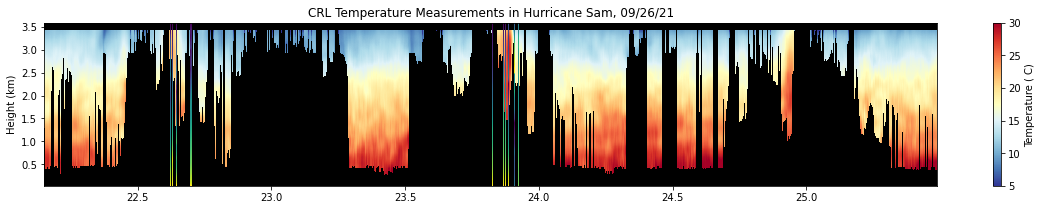

In [3]:
warnings.filterwarnings("ignore")

# make base CRL figure
fig = plt.figure( figsize=(20, 3))
make_plots.plot_T( crl_path, file_names[16], 0, 6000, 'time')
plt.title( "CRL Temperature Measurements in Hurricane Sam, 09/26/21")
plt.clim(5, 30) 

# temperature from dropsondes

# make a new height array for the rh measurements
os.chdir( crl_path)
crl_data = xr.open_dataset( file_names[16])

# plot all dropsonde locations to get a sense of where they are!
os.chdir( sonde_path_0926)

# for eye 1
# plt.xlim( [22.3, 23.3])
# for eye 2
# plt.xlim( [23.0, 24.2])


for ind in range( 13):
    sonde = xr.open_dataset( file_names_0926[ ind])   
    
    # look at the initial time for each sonde
    # do some horrible conversions to get result into a float, there's probably a better solution
    start_string_time = sonde.time[0].values.astype(str)[11:22]
    start_time = float( start_string_time[0:2]) + float( start_string_time[3:5]) / 60 + float( start_string_time[6:8]) / 3600
    end_string_time = sonde.time[-1].values.astype(str)[11:22]
    end_time = float( end_string_time[0:2]) + float( end_string_time[3:5]) / 60 + float( end_string_time[6:8]) / 3600
    mid_time = ( start_time + end_time ) / 2
    
    quantity = 'tdry'
    # get temperatures
    
    T = sonde[quantity].values[~np.isnan( sonde.tdry.values)]
    heights = np.linspace( np.nanmin( -crl_data.H.values), np.nanmax( -crl_data.H.values), len( T))

    plt.pcolormesh( [mid_time - .00125, mid_time + .00125], heights, np.matrix( [T, T] ).transpose() ) # .0025
    
    # print( "start " + str(start_time) + " end " + str(end_time) + " mid " + str(mid_time))
    print( "ref lat = "+ str( sonde.reference_lat.values))
    
plt.clim(5, 30) 

warnings.filterwarnings("default")


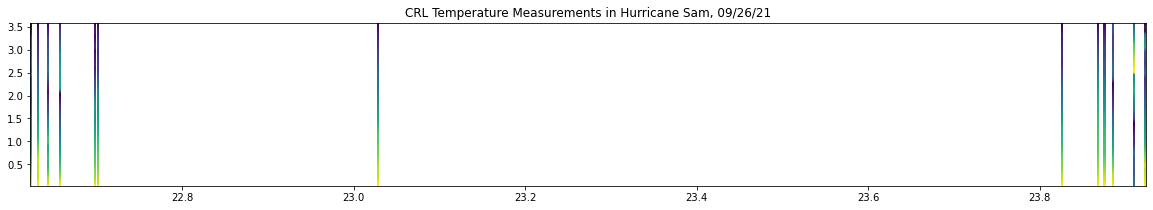

In [8]:
warnings.filterwarnings("ignore")

# make base CRL figure
fig = plt.figure( figsize=(20, 3))
# make_plots.plot_T( crl_path, file_names[16], 0, 6000, 'time')
plt.title( "CRL Temperature Measurements in Hurricane Sam, 09/26/21")

make_plots.plot_sondes( crl_path, file_names[16], sonde_path_0926, 'tdry')